## Example Code Step by Step
Step 1: Import Libraries and Download Data


[*********************100%***********************]  1 of 1 completed


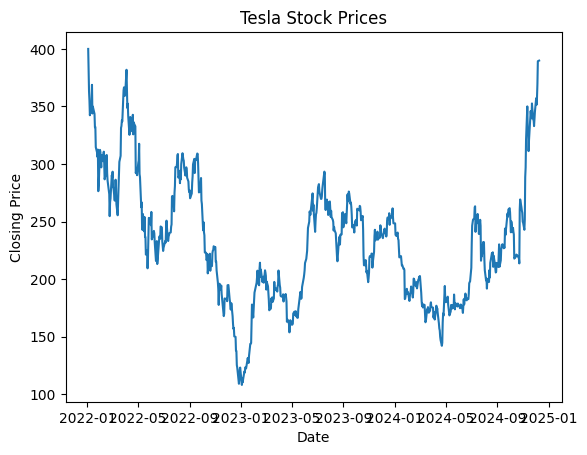

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Download stock data
data = yf.download('TSLA', start='2022-01-01', end='2024-12-10')
data = data[['Close']]
plt.plot(data)
plt.title('Tesla Stock Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()



Step 2: Preprocess the Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create time-step data
def create_dataset(data, time_step=10):
    X, Y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step, 0])
        Y.append(data[i+time_step, 0])
    return np.array(X), np.array(Y)

X, Y = create_dataset(scaled_data, time_step=10)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM


Step 3: Build and Train the LSTM Model

In [ ]:
%%capture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(10, 1))) # 第一層 LSTM
model.add(LSTM(50)) # 第二層 LSTM
model.add(Dense(1)) # 輸出層

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=50, batch_size=32, verbose=1)



Step 4: Make Predictions and Visualize Results


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


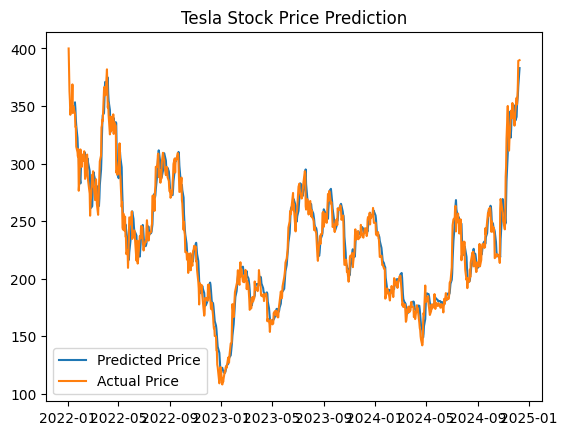

In [ ]:
# Predict the stock prices
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)
# Scale back to original prices

# Visualize predictions
plt.plot(data.index[10:], predictions, label='Predicted Price')
plt.plot(data, label='Actual Price')
plt.legend()
plt.title('Tesla Stock Price Prediction')
plt.show()
